### 데이터 전처리

### <b>Q1. 중복 데이터 제거</b>
---
 - 중복된 행데이터 삭제

In [1]:
import pandas as pd
train_df = pd.read_csv('TrainDataAll.csv',delimiter=',')

In [2]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10157 entries, 0 to 10156
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    10157 non-null  int64  
 1   url_num_hyphens_dom        10157 non-null  int64  
 2   url_num_dom_token          10157 non-null  int64  
 3   url_path_len               10157 non-null  int64  
 4   url_filename_len           10157 non-null  int64  
 5   url_longest_dom_token_len  10157 non-null  int64  
 6   url_average_dom_token_len  10157 non-null  float64
 7   url_tld                    9157 non-null   object 
 8   url_domain_len             10157 non-null  int64  
 9   url_hostname_len           10157 non-null  int64  
 10  url_num_dots               10157 non-null  int64  
 11  url_num_underscores        10157 non-null  int64  
 12  url_num_equals             10157 non-null  int64  
 13  url_num_slashes            10157 non-null  int

In [3]:
non_numeric_cols = train_df.select_dtypes(exclude=['number']).columns.tolist()
print("숫자가 아닌 컬럼들:", non_numeric_cols)


숫자가 아닌 컬럼들: ['url_tld', 'repu']


In [4]:
train_dropstr_df = train_df.drop('url_tld',axis=1)

In [5]:
train_dropstr_df.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_num_dom_token', 'url_path_len',
       'url_filename_len', 'url_longest_dom_token_len',
       'url_average_dom_token_len', 'url_domain_len', 'url_hostname_len',
       'url_num_dots', 'url_num_underscores', 'url_num_equals',
       'url_num_slashes', 'url_num_dash', 'url_num_semicolon', 'url_num_at',
       'url_num_percent', 'url_num_plus', 'url_query_len',
       'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_count_consonants', 'url_num_digits', 'url_chinese_present',
       'url_port', 'url_has_https', 'url_has_ip_address', 'url_num_subdomains',
       'url_has_suspicious_words', 'url_length_category',
       'url_has_port_in_url', 'url_num_special_chars', 'url_num_params',
       'url_num_fragments', 'url_starts_with_www', 'url_is_shortened',
       'url_has_email', 'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_n

In [6]:
train_dropstr_df['repu'].value_counts()

repu
malicious    6735
benign       3422
Name: count, dtype: int64

In [7]:
# 중복 데이터 제거 : drop_duplicates()
train_dropstr_df=train_dropstr_df.drop_duplicates()

In [8]:
train_dropstr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9906 entries, 0 to 10156
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    9906 non-null   int64  
 1   url_num_hyphens_dom        9906 non-null   int64  
 2   url_num_dom_token          9906 non-null   int64  
 3   url_path_len               9906 non-null   int64  
 4   url_filename_len           9906 non-null   int64  
 5   url_longest_dom_token_len  9906 non-null   int64  
 6   url_average_dom_token_len  9906 non-null   float64
 7   url_domain_len             9906 non-null   int64  
 8   url_hostname_len           9906 non-null   int64  
 9   url_num_dots               9906 non-null   int64  
 10  url_num_underscores        9906 non-null   int64  
 11  url_num_equals             9906 non-null   int64  
 12  url_num_slashes            9906 non-null   int64  
 13  url_num_dash               9906 non-null   int64  
 

#### <b>텍스트와 범주형 특성 처리 실습</b>
---

In [9]:
# replace() 함수 사용
# 'benign'=1,'malicious'=-1 처리
train_dropstr_df['repu'].replace({'benign':1,'malicious':-1}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9132\1518686267.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_dropstr_df['repu'].replace({'benign':1,'malicious':-1}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9132\1518686267.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tr

In [10]:
train_dropstr_df['repu'].unique()

array([ 1, -1], dtype=int64)

In [11]:
train_dropstr_df.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_num_dom_token', 'url_path_len',
       'url_filename_len', 'url_longest_dom_token_len',
       'url_average_dom_token_len', 'url_domain_len', 'url_hostname_len',
       'url_num_dots', 'url_num_underscores', 'url_num_equals',
       'url_num_slashes', 'url_num_dash', 'url_num_semicolon', 'url_num_at',
       'url_num_percent', 'url_num_plus', 'url_query_len',
       'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_count_consonants', 'url_num_digits', 'url_chinese_present',
       'url_port', 'url_has_https', 'url_has_ip_address', 'url_num_subdomains',
       'url_has_suspicious_words', 'url_length_category',
       'url_has_port_in_url', 'url_num_special_chars', 'url_num_params',
       'url_num_fragments', 'url_starts_with_www', 'url_is_shortened',
       'url_has_email', 'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_n

### <b>Q3. 결측치 제거</b>
---

In [12]:
train_dropstr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9906 entries, 0 to 10156
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    9906 non-null   int64  
 1   url_num_hyphens_dom        9906 non-null   int64  
 2   url_num_dom_token          9906 non-null   int64  
 3   url_path_len               9906 non-null   int64  
 4   url_filename_len           9906 non-null   int64  
 5   url_longest_dom_token_len  9906 non-null   int64  
 6   url_average_dom_token_len  9906 non-null   float64
 7   url_domain_len             9906 non-null   int64  
 8   url_hostname_len           9906 non-null   int64  
 9   url_num_dots               9906 non-null   int64  
 10  url_num_underscores        9906 non-null   int64  
 11  url_num_equals             9906 non-null   int64  
 12  url_num_slashes            9906 non-null   int64  
 13  url_num_dash               9906 non-null   int64  
 

In [13]:
# 결측치 제거
# dropna()

train_dropna_df = train_dropstr_df.dropna(axis=0).reset_index(drop=True)

In [14]:
train_dropna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9906 entries, 0 to 9905
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    9906 non-null   int64  
 1   url_num_hyphens_dom        9906 non-null   int64  
 2   url_num_dom_token          9906 non-null   int64  
 3   url_path_len               9906 non-null   int64  
 4   url_filename_len           9906 non-null   int64  
 5   url_longest_dom_token_len  9906 non-null   int64  
 6   url_average_dom_token_len  9906 non-null   float64
 7   url_domain_len             9906 non-null   int64  
 8   url_hostname_len           9906 non-null   int64  
 9   url_num_dots               9906 non-null   int64  
 10  url_num_underscores        9906 non-null   int64  
 11  url_num_equals             9906 non-null   int64  
 12  url_num_slashes            9906 non-null   int64  
 13  url_num_dash               9906 non-null   int64

### <b>Q4. 데이터 탐색을 통한 불필요한 칼럼 제거</b>
---
- ex) 그래프, 데이터 상관관계 corr()등 활용
- corr() 메서드 : 모든 특성 간의 표준 상관계수(피어슨의 R)
  - 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법
  - r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 
- scatter 그래프를 활용한 데이터 분석

In [15]:
#train_df.drop(columns=["Unnamed: 0"],inplace=True)

In [16]:
train_dropna_df.corr()

,url_len,url_num_hyphens_dom,url_num_dom_token,url_path_len,url_filename_len,url_longest_dom_token_len,url_average_dom_token_len,url_domain_len,url_hostname_len,url_num_dots,...,html_num_tags('form'),html_num_tags('a'),html_num_tags('small'),html_num_tags('span'),html_num_tags('input'),html_num_tags('applet'),html_num_tags('img'),html_num_tags('video'),html_num_tags('audio'),repu
url_len,1.000000,0.015434,0.232457,0.512924,0.258090,0.133889,0.154463,0.197311,0.197043,0.670955,...,-0.002294,-0.054251,0.000578,-0.061660,0.004196,0.007139,-0.025640,-0.046518,-0.007066,-0.149365
url_num_hyphens_dom,0.015434,1.000000,0.292736,-0.201299,-0.111591,0.682589,0.577031,0.655830,0.656380,0.085313,...,-0.059628,-0.095756,-0.010402,-0.104620,0.003705,-0.009487,-0.024338,-0.039207,-0.012002,-0.350704
url_num_dom_token,0.232457,0.292736,1.000000,0.004414,-0.039515,0.439316,0.244751,0.697636,0.697665,0.402211,...,-0.008555,-0.077319,-0.000011,-0.087008,0.009456,0.011930,-0.012935,-0.070379,-0.017236,-0.197668
url_path_len,0.512924,-0.201299,0.004414,1.000000,0.550901,-0.144814,-0.105009,-0.120930,-0.120775,0.055601,...,0.077045,0.046248,0.013151,0.033138,0.037502,0.024013,-0.011969,-0.024000,0.005566,0.145597
url_filename_len,0.258090,-0.111591,-0.039515,0.550901,1.000000,-0.135469,-0.131215,-0.117367,-0.117235,0.045118,...,0.033764,0.060680,0.012424,0.050136,0.020487,0.002113,-0.004189,-0.000281,-0.000248,0.214256
url_longest_dom_token_len,0.133889,0.682589,0.439316,-0.144814,-0.135469,1.000000,0.867237,0.919645,0.920003,0.108900,...,-0.044909,-0.145299,-0.011343,-0.149022,0.003533,-0.012397,-0.041012,-0.070255,-0.017095,-0.458227
url_average_dom_token_len,0.154463,0.577031,0.244751,-0.105009,-0.131215,0.867237,1.000000,0.792490,0.792524,0.042795,...,-0.011790,-0.170449,-0.011046,-0.176195,0.043209,-0.013409,-0.045600,-0.087822,-0.018878,-0.549979
url_domain_len,0.197311,0.655830,0.697636,-0.120930,-0.117367,0.919645,0.792490,1.000000,0.999932,0.241119,...,-0.039732,-0.149068,-0.010211,-0.152825,0.002665,-0.007541,-0.036306,-0.078122,-0.017100,-0.441685
url_hostname_len,0.197043,0.656380,0.697665,-0.120775,-0.117235,0.920003,0.792524,0.999932,1.000000,0.240948,...,-0.039666,-0.149122,-0.010202,-0.152835,0.002760,-0.007537,-0.036347,-0.078132,-0.017098,-0.441696
url_num_dots,0.670955,0.085313,0.402211,0.055601,0.045118,0.108900,0.042795,0.241119,0.240948,1.000000,...,-0.043168,-0.056232,-0.002782,-0.055663,-0.025107,0.002261,-0.013662,-0.031454,-0.008052,-0.144858


In [17]:
train_dropna_df.corr()['repu'].sort_values(ascending=False)

repu                         1.000000
html_num_tags('script')      0.376377
html_num_tags('div')         0.313193
url_starts_with_www          0.267041
html_num_tags('a')           0.262090
html_num_tags('span')        0.238719
url_num_dash                 0.222113
url_filename_len             0.214256
url_path_len                 0.145597
html_num_tags('form')        0.098546
html_num_tags('iframe')      0.086285
html_num_tags('video')       0.079949
url_has_https                0.074447
html_num_tags('img')         0.050566
url_num_plus                 0.042132
html_num_tags('small')       0.034176
html_num_tags('object')      0.025095
html_num_tags('input')       0.018869
html_num_tags('audio')       0.016509
html_num_tags('embed')      -0.008722
html_num_tags('applet')     -0.012341
url_length_category         -0.013660
url_num_fragments           -0.017863
url_has_port_in_url         -0.020979
url_port                    -0.020979
url_num_percent             -0.040272
url_num_unde

In [18]:
train_dropna_df = train_dropna_df.drop(['url_chinese_present'],axis=1)

In [19]:
train_dropnan_df['url_chinese_present']

NameError: name 'train_dropnan_df' is not defined

#### <b>scatter 그래프를 활용한 데이터 분석 실습</b>
---

In [20]:
import matplotlib.pyplot as plt

In [21]:
# 1 = 'blue',-1 = 'red' 처리
train_dropna_df['color'] = train_dropna_df['repu'].map({1:"blue", -1:"red"})

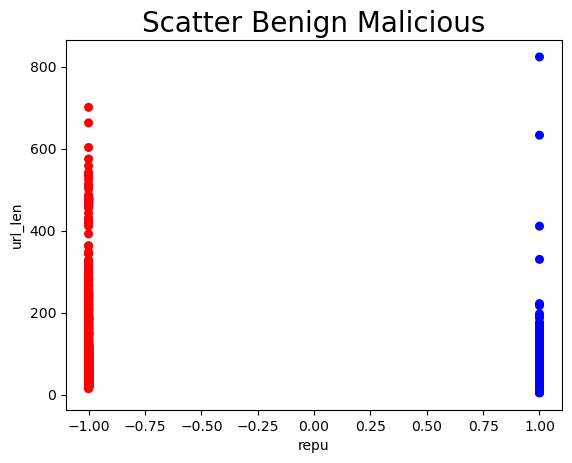

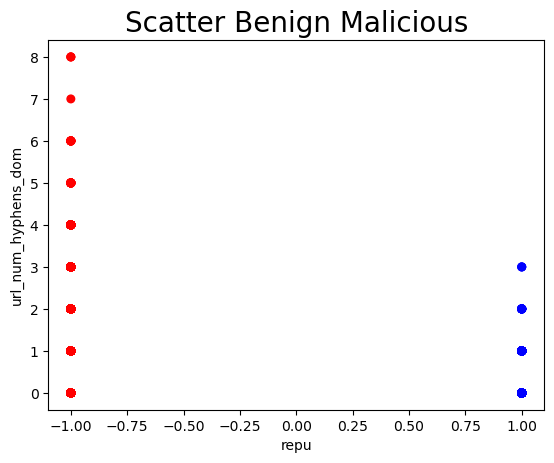

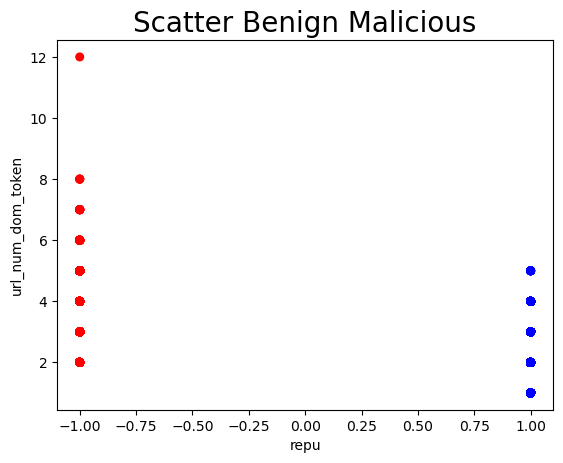

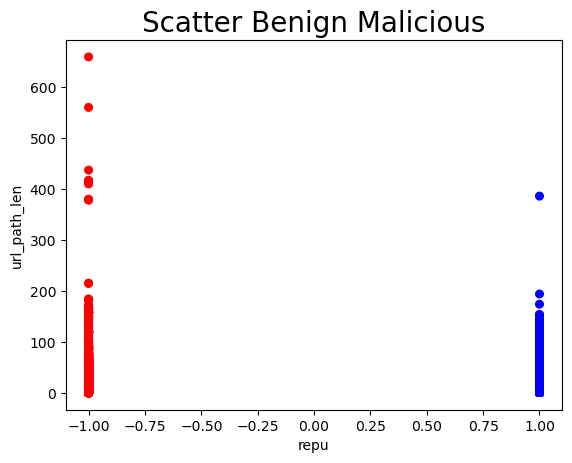

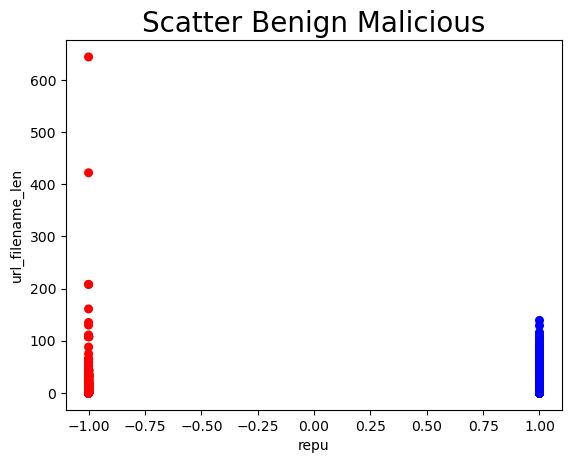

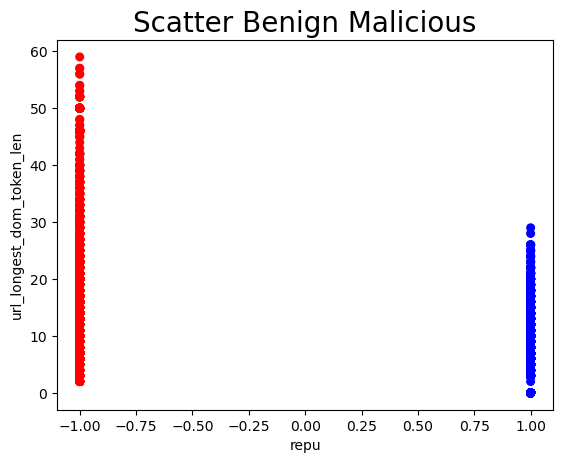

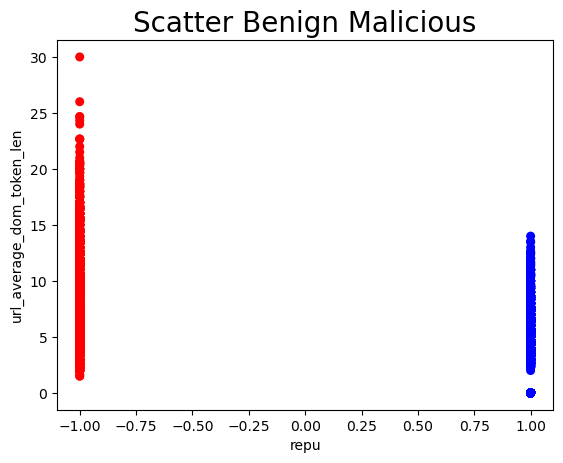

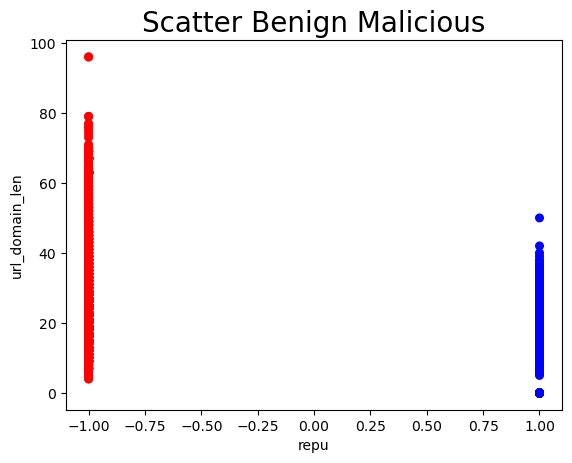

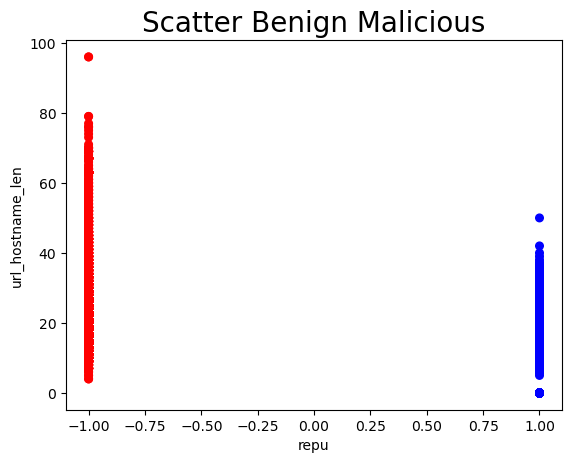

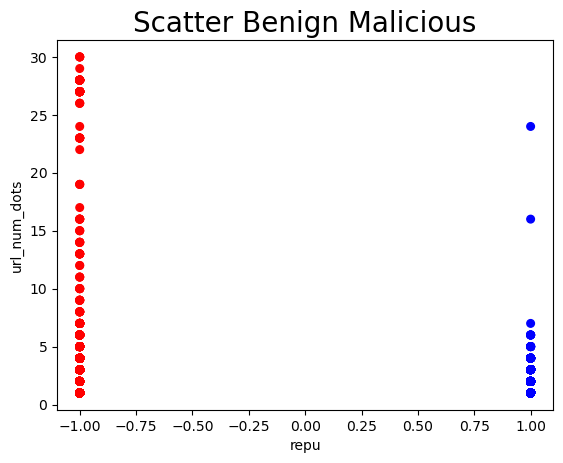

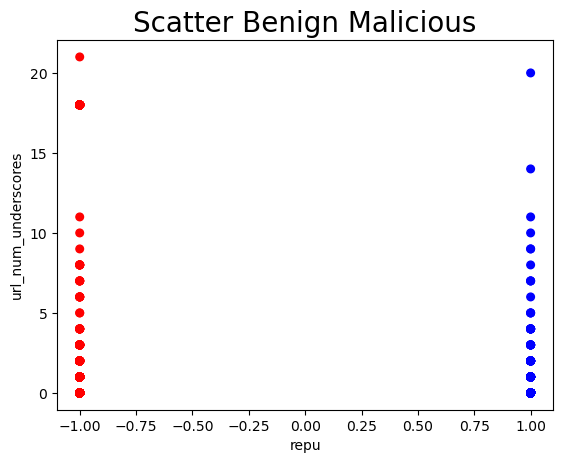

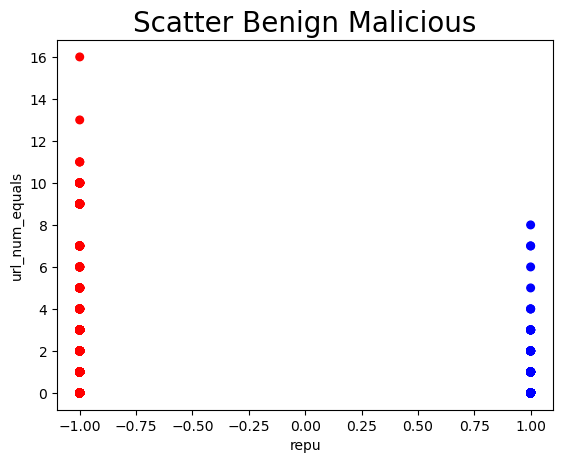

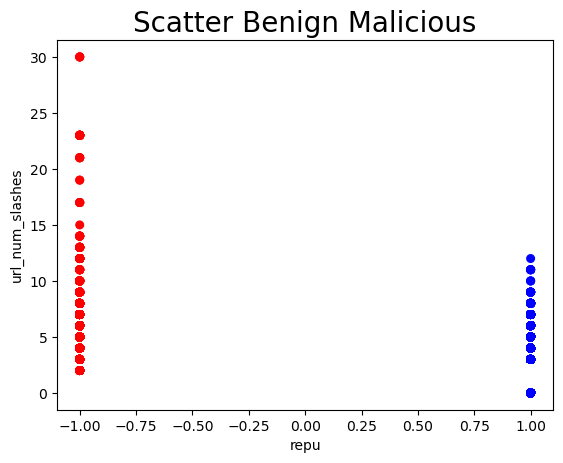

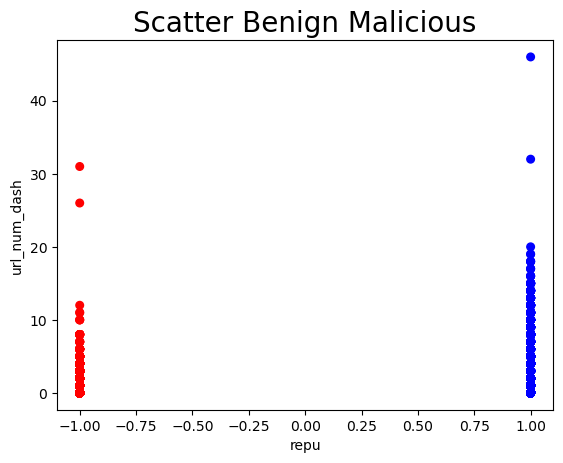

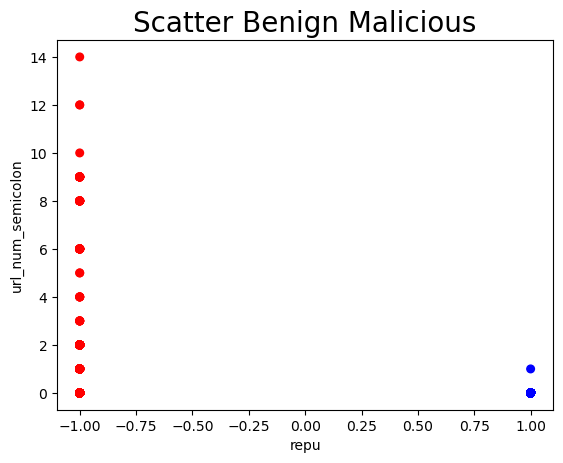

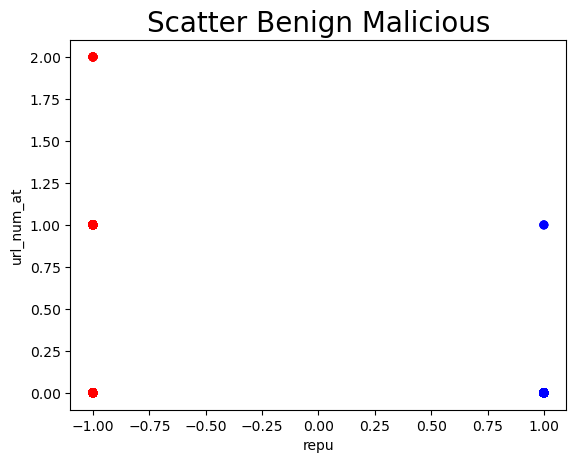

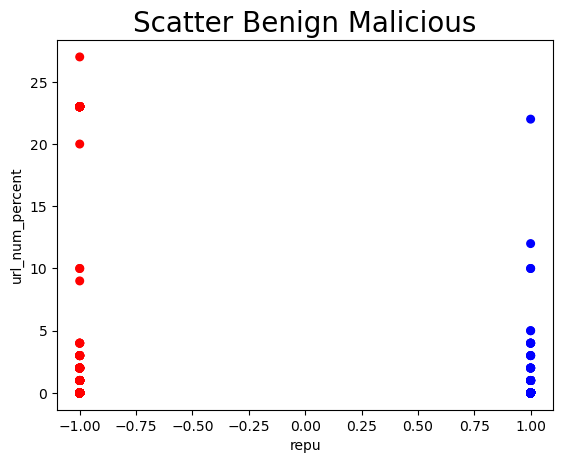

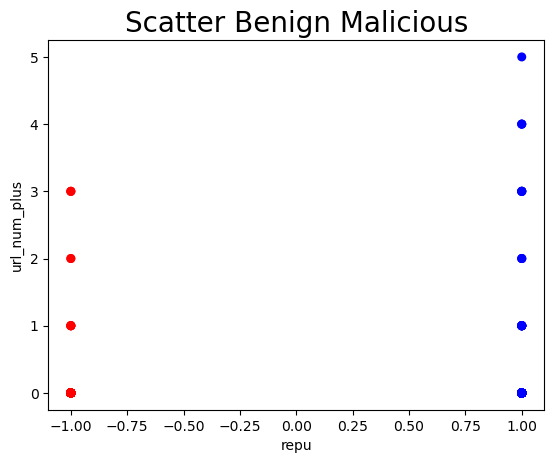

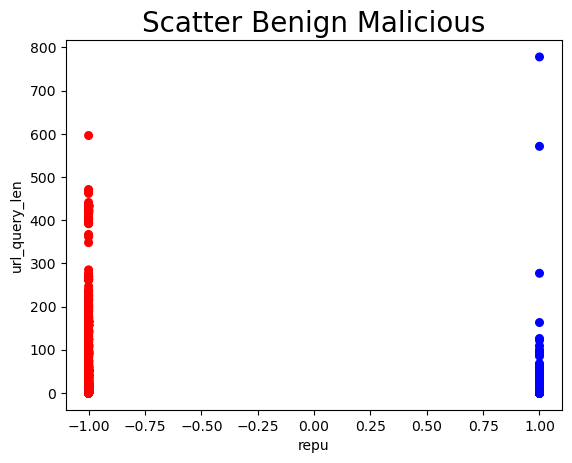

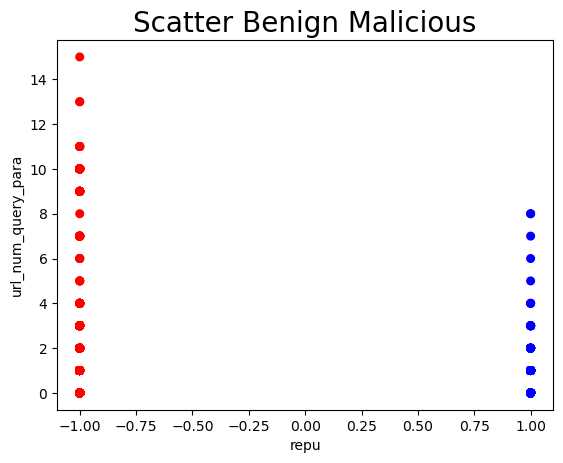

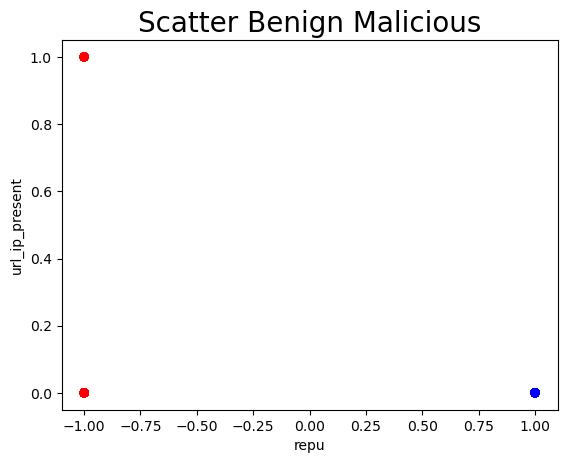

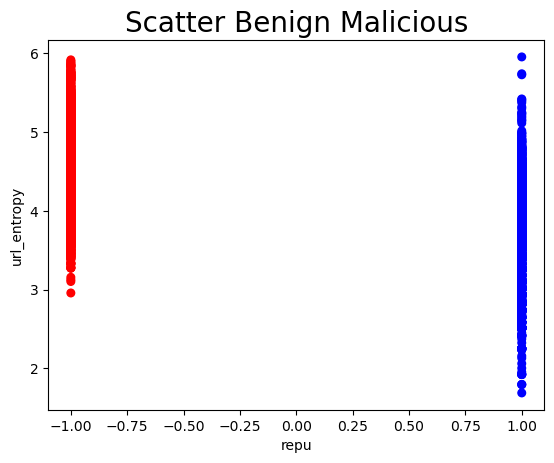

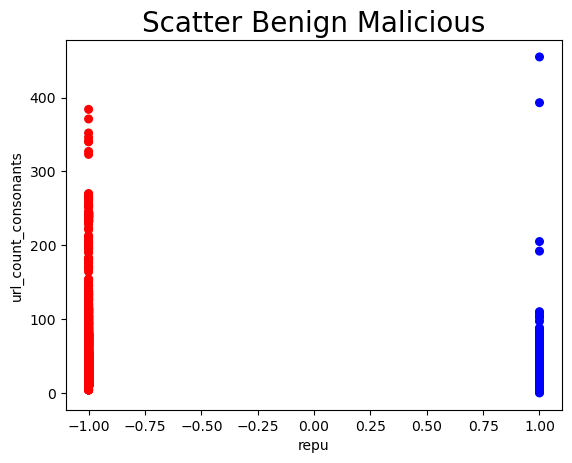

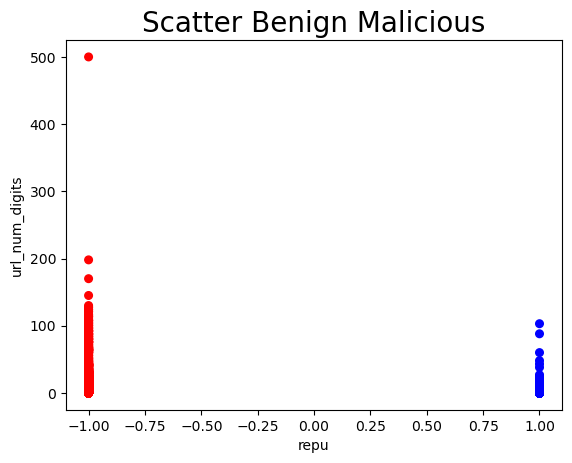

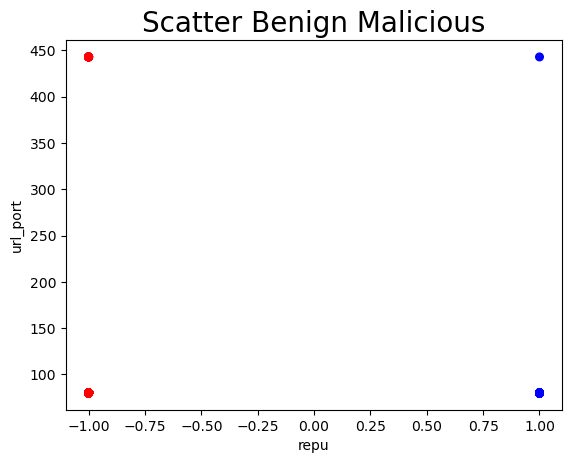

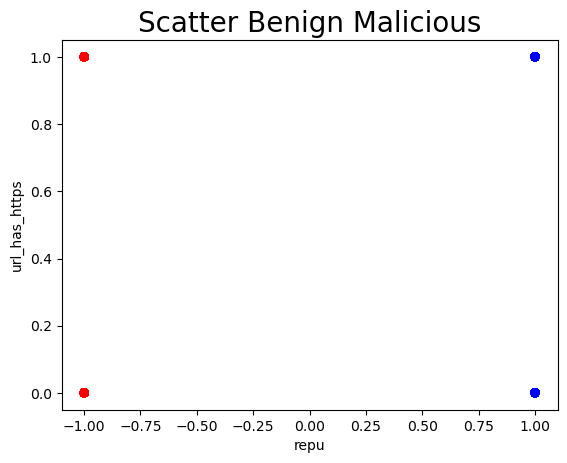

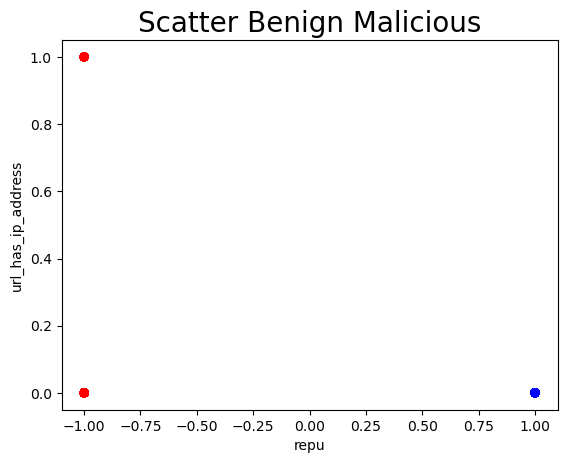

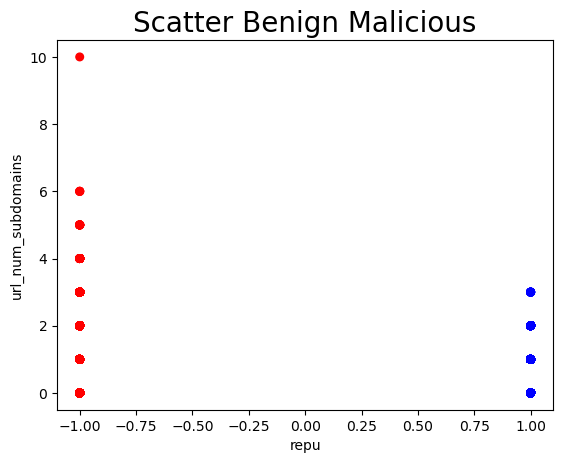

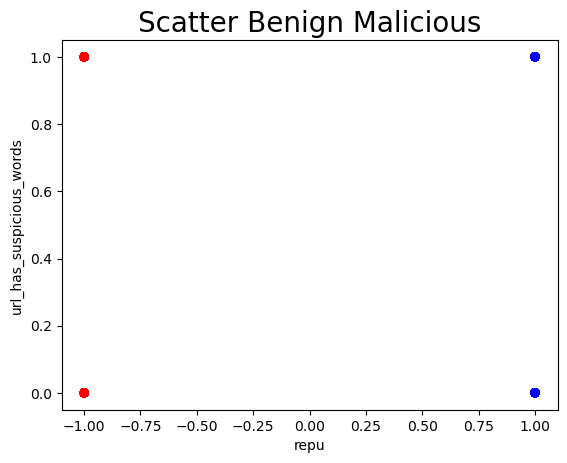

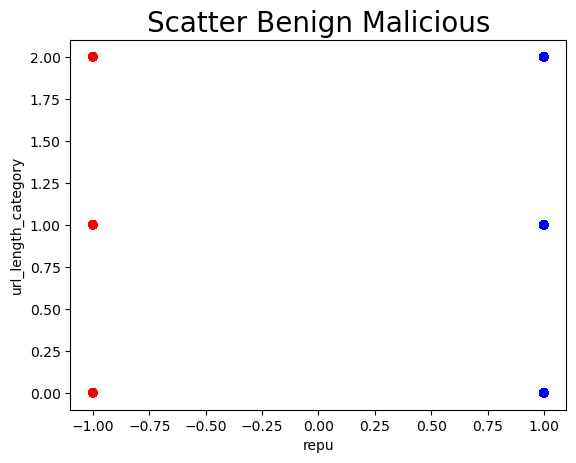

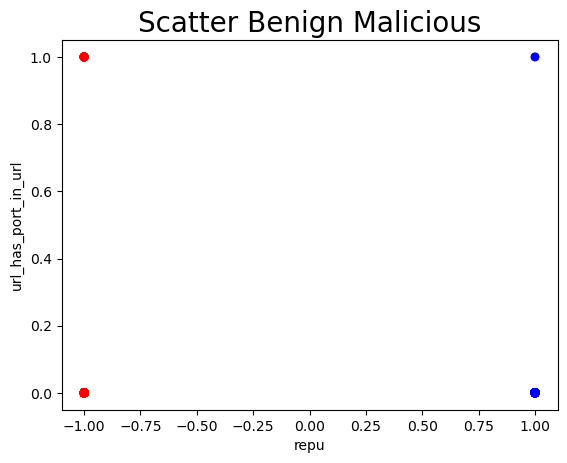

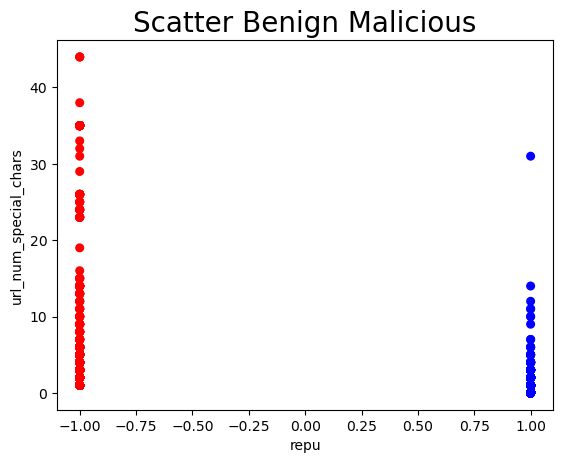

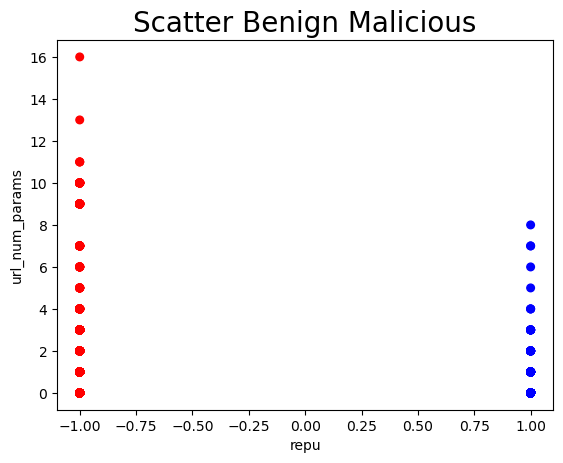

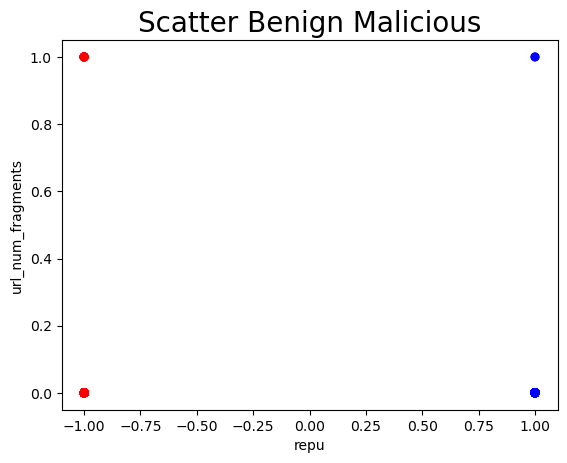

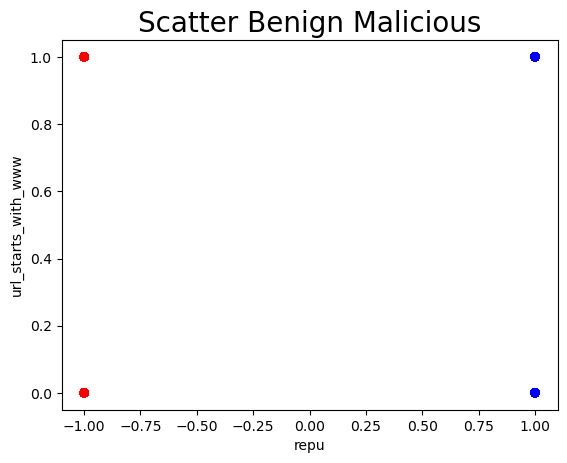

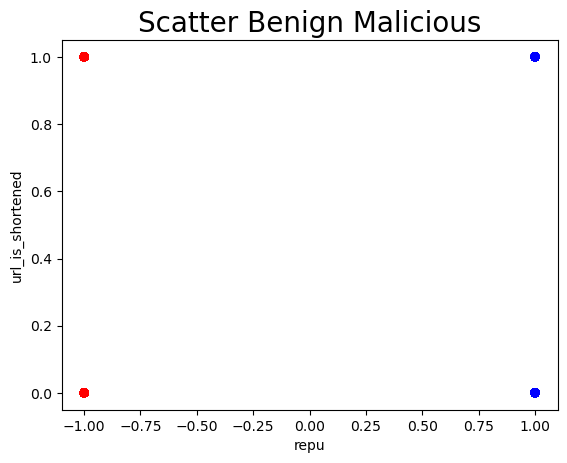

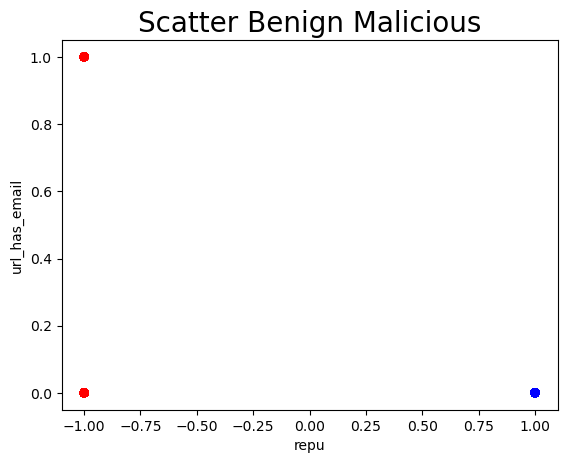

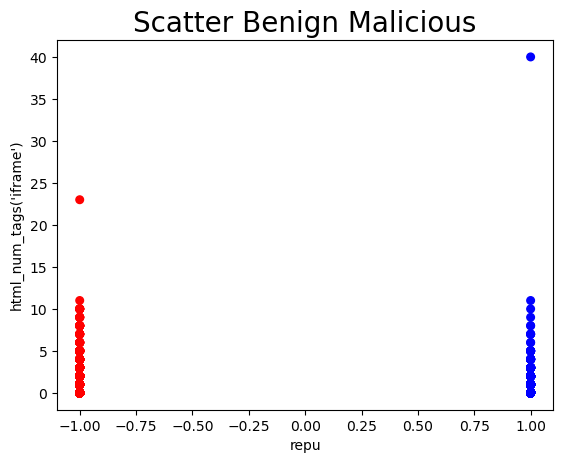

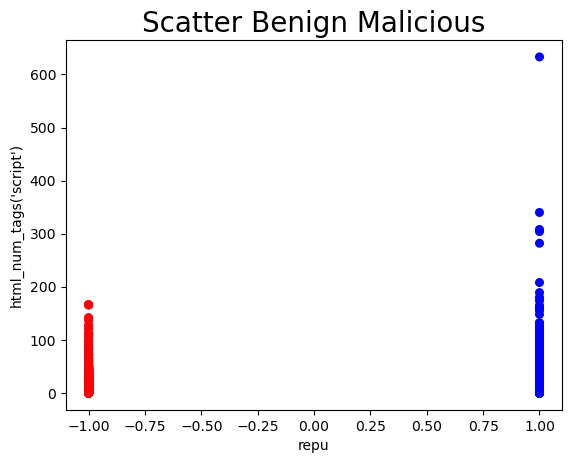

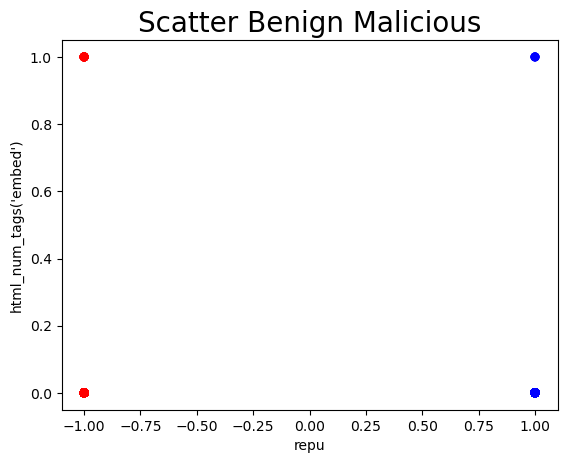

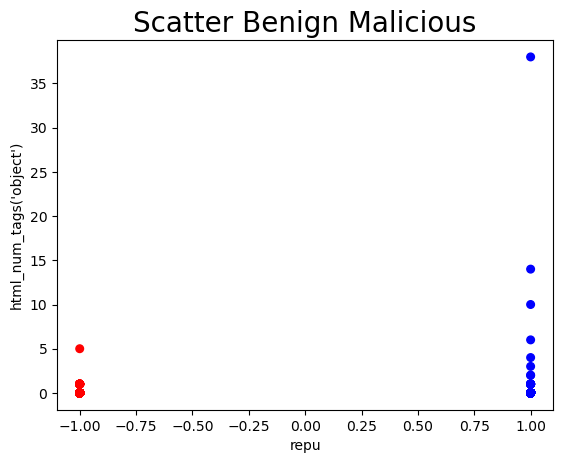

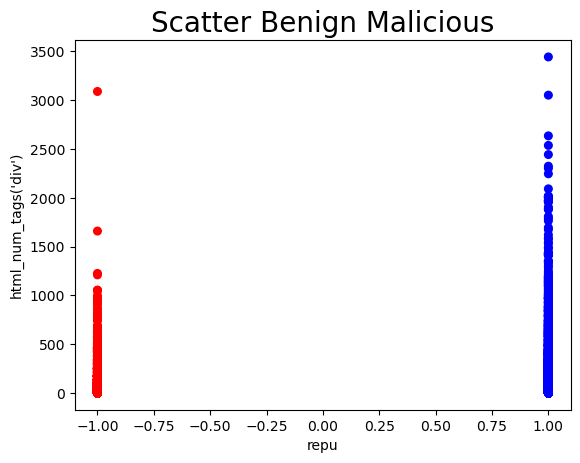

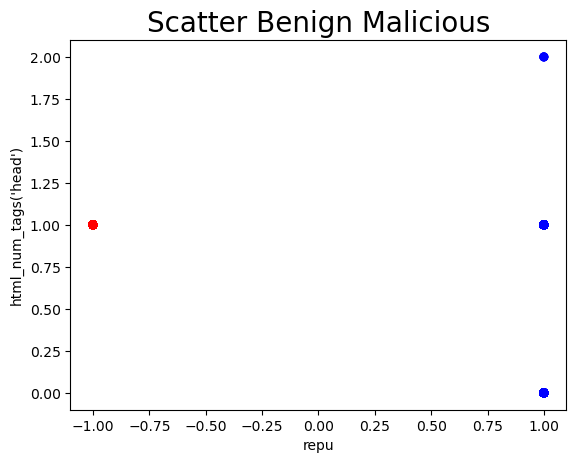

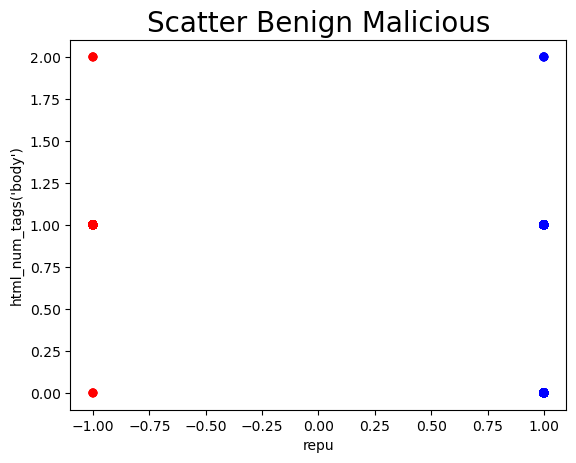

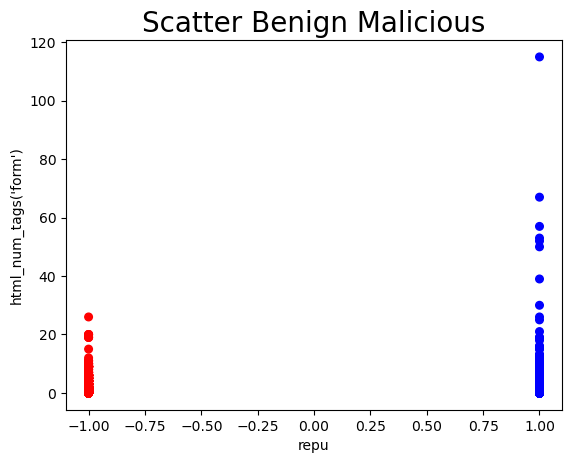

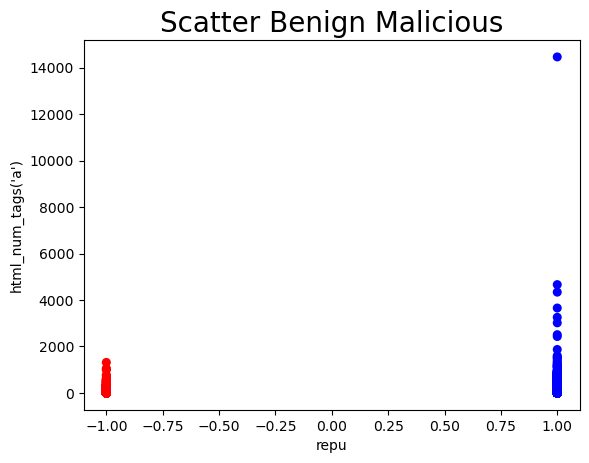

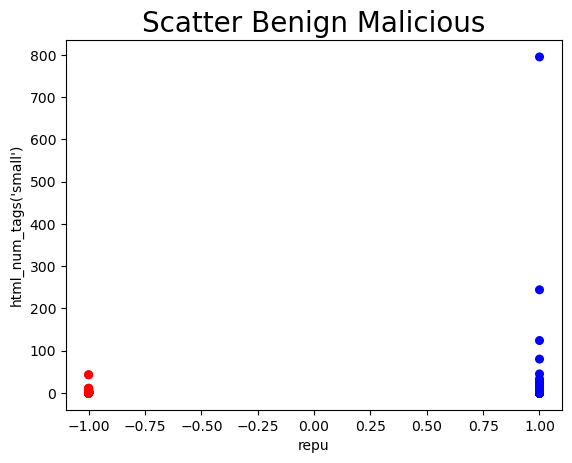

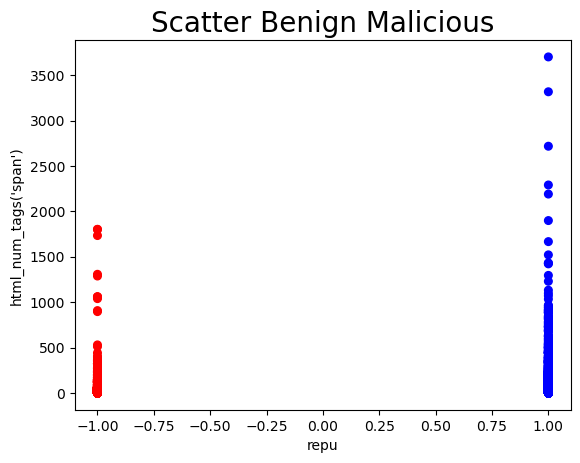

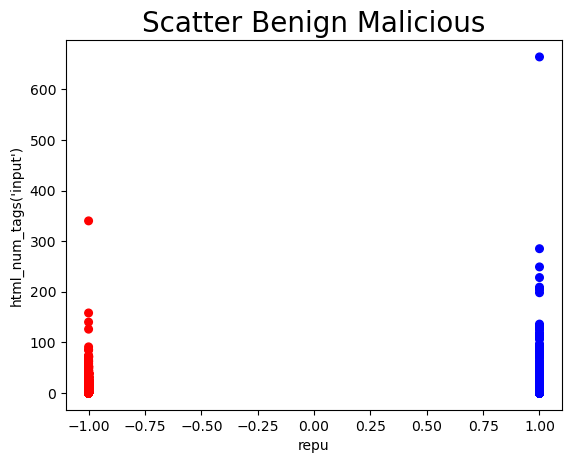

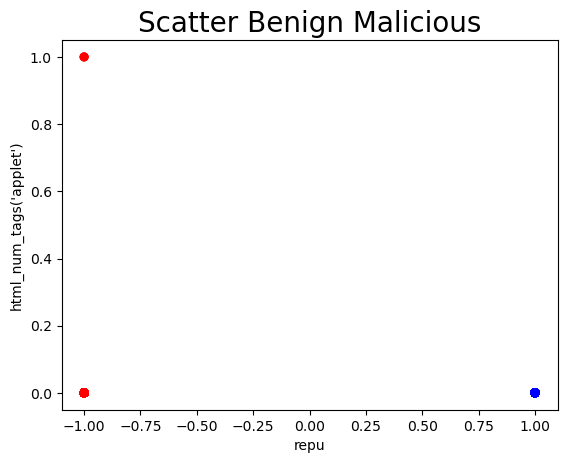

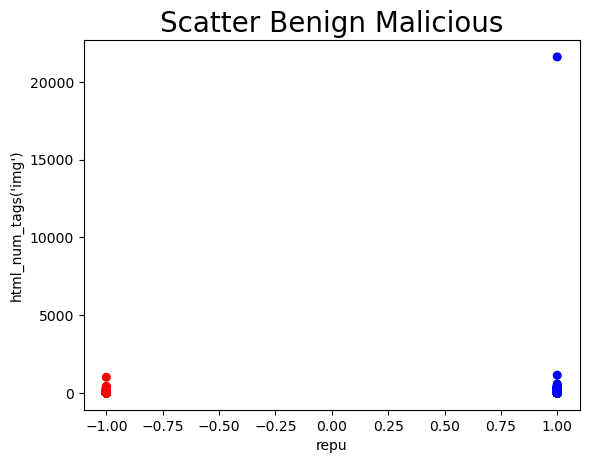

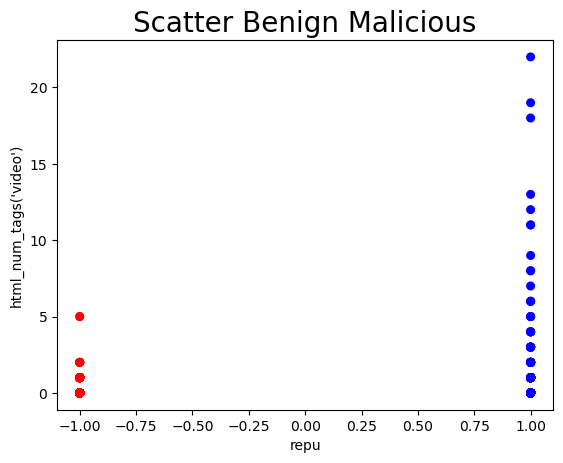

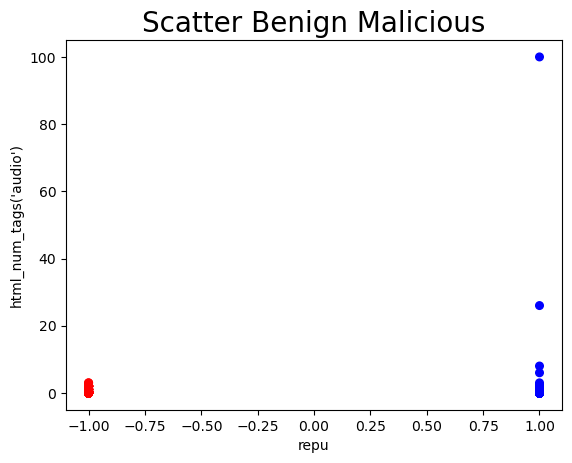

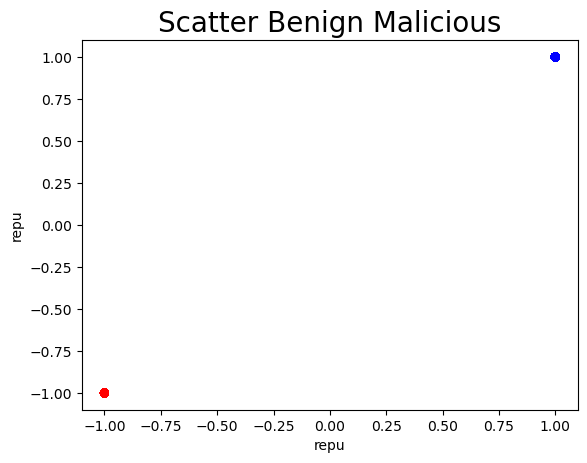

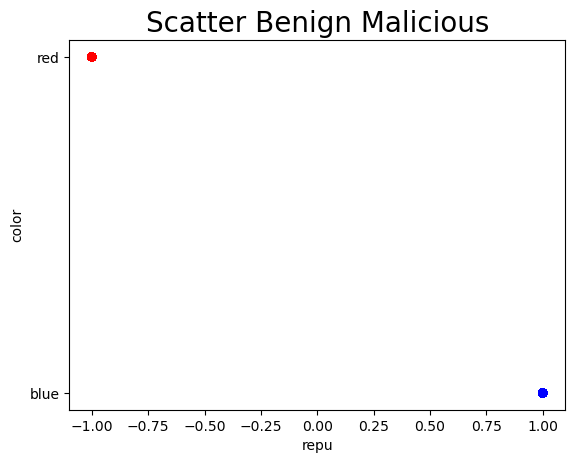

In [22]:
y_list = train_dropna_df.columns

for i in range(0, len(y_list)):
    train_dropna_df.plot(kind='scatter',x='repu',y=y_list[i],s=30, c=train_dropna_df['color'])
    plt.title('Scatter Benign Malicious', fontsize=20)
    plt.xlabel('repu')
    plt.ylabel(y_list[i])
    plt.show()

#### <b>불필요한 컬럼 제거</b>
---

In [23]:
train_dropna_df.drop(columns=["color"],inplace=True)

In [24]:
train_dropna_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9906 entries, 0 to 9905
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   url_len                    9906 non-null   int64  
 1   url_num_hyphens_dom        9906 non-null   int64  
 2   url_num_dom_token          9906 non-null   int64  
 3   url_path_len               9906 non-null   int64  
 4   url_filename_len           9906 non-null   int64  
 5   url_longest_dom_token_len  9906 non-null   int64  
 6   url_average_dom_token_len  9906 non-null   float64
 7   url_domain_len             9906 non-null   int64  
 8   url_hostname_len           9906 non-null   int64  
 9   url_num_dots               9906 non-null   int64  
 10  url_num_underscores        9906 non-null   int64  
 11  url_num_equals             9906 non-null   int64  
 12  url_num_slashes            9906 non-null   int64  
 13  url_num_dash               9906 non-null   int64

## Q5. train_test_split을 이용하여, train_x, val_x, train_y, val_y로 데이터 분리
---

- test_size = 0.3
- random_state = 2021

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# X = train_df.iloc[:,0:len(train_df.columns)-1].values
# y = train_df.iloc[:,len(train_df.columns)-1].values

In [27]:
X = train_dropna_df.drop('repu',axis=1)
y = train_dropna_df['repu']

In [28]:
# train_test_split 사용
train_x, val_x, train_y, val_y = train_test_split(X, y,test_size=0.3,random_state=2021) 

In [29]:
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((6934, 53), (2972, 53), (6934,), (2972,))

### AI모델링

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### <b>Confusion Matrix 함수 정의</b>
---

- Confusion Matrix란?
 - Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표
 - 참고 사이트 : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
 
 


In [31]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [32]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <b> Q2. DecisonTree 모델

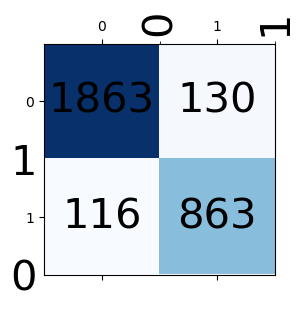

In [33]:
# 1. import
from sklearn.tree import DecisionTreeClassifier
# 2.선언
dtc = DecisionTreeClassifier()

# 3. fit()
dtc.fit(train_x,train_y)

# 3. predict()
dtc_pred = dtc.predict(val_x)

# train 및 val 데이터 정확도 확인 : score()
dtc.score(train_x, train_y), dtc.score(val_x, val_y)

#Confusion Matrix 확인
confusion = confusion_matrix(val_y, dtc_pred)
fig, ax = plt.subplots(figsize=(10,3))

def plot_confusion_matrix(ax, cm, fontsize=14):
    labels = [str(i) for i in range(len(cm))]

    ax.matshow(cm, cmap='Blues')

    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', fontsize=fontsize)

    # 축 위치 설정
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)

    # ✅ rotation 값을 숫자로!
    ax.set_xticklabels(labels, rotation=90, fontsize=fontsize, minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    ax.tick_params(which="minor", bottom=False, left=False)
plot_confusion_matrix(ax, confusion, fontsize=30)





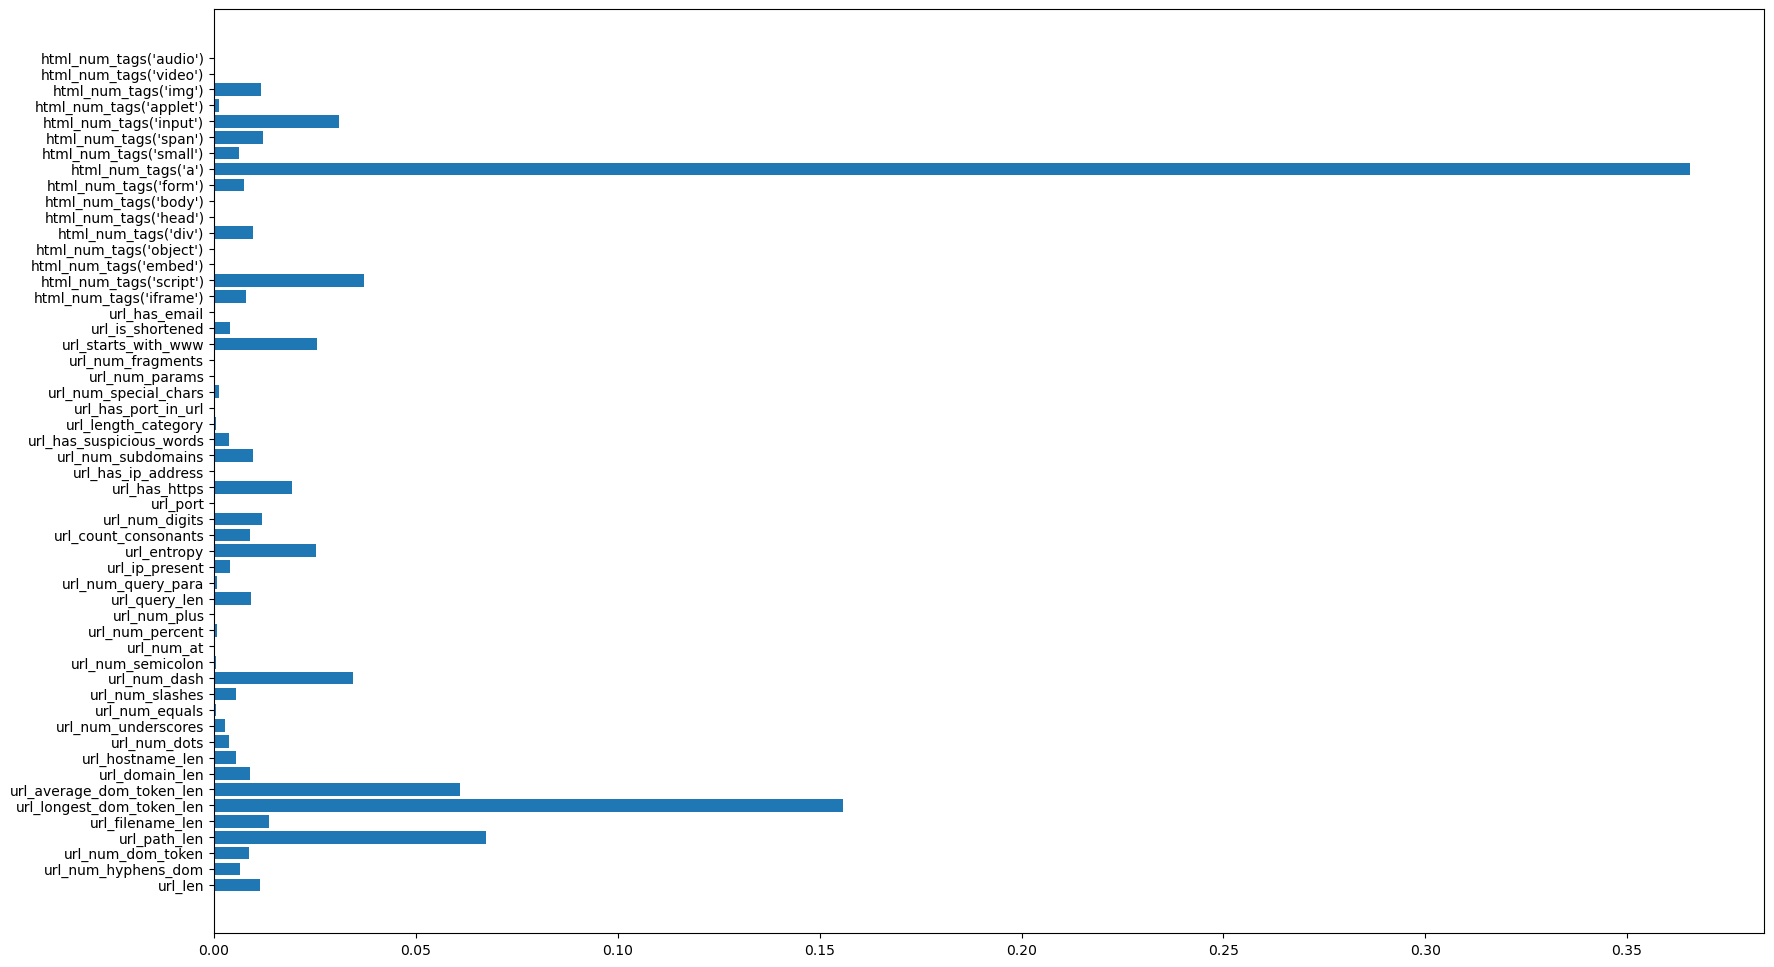

In [34]:
plt.figure(figsize=(20,12))
plt.barh(y=train_dropna_df.columns[:-1],
        width = dtc.feature_importances_)
plt.show()

### <b>앙상블(Ensemble)</b>

## Q3. Random Forest 모델

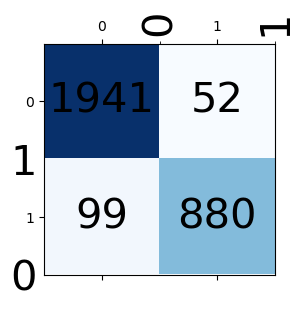

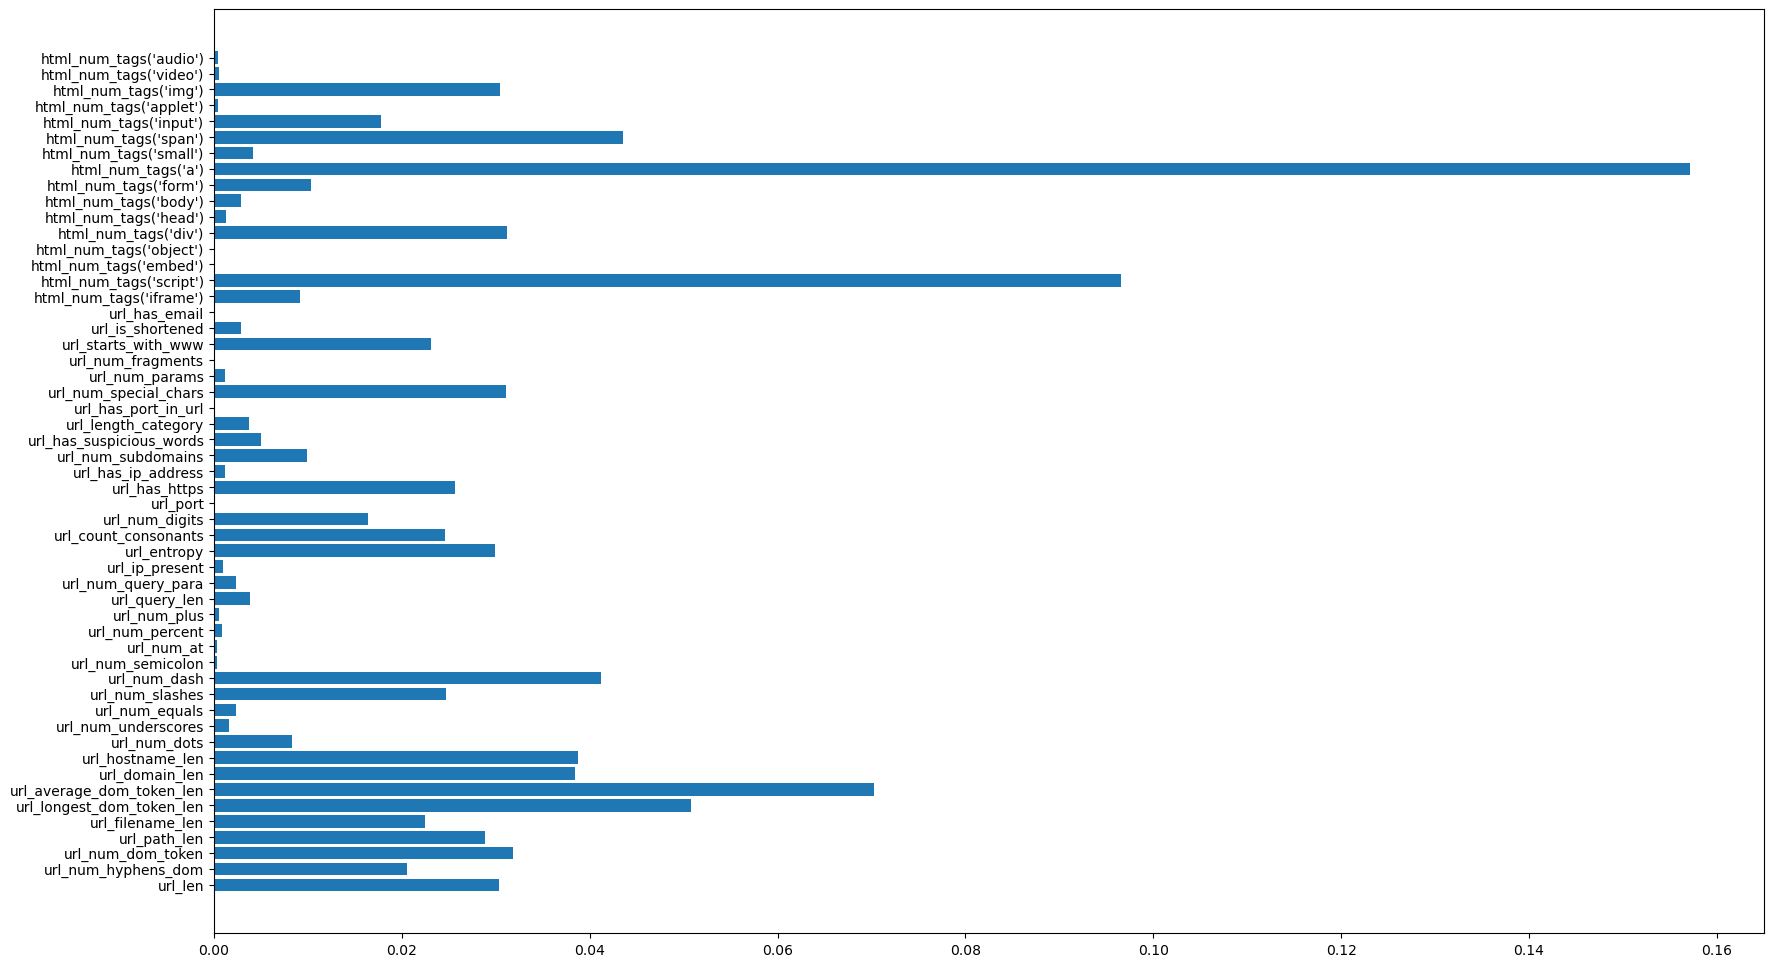

In [35]:
# 1. import
from sklearn.ensemble import RandomForestClassifier
# 2.선언
rfc = RandomForestClassifier()

# 3. fit()
rfc.fit(train_x,train_y)

# 3. predict()
rfc_pred = rfc.predict(val_x)

# train 및 val 데이터 정확도 확인 :score()
rfc.score(train_x,train_y), rfc.score(val_x, val_y)

# Confusion Matrix 확인
confusion = confusion_matrix(val_y, rfc_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=train_dropna_df.columns[:-1],
        width = rfc.feature_importances_)
plt.show()

### <b> Q4. AdaBoost 모델

c:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


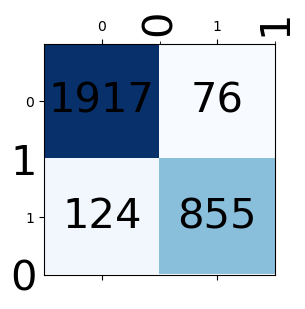

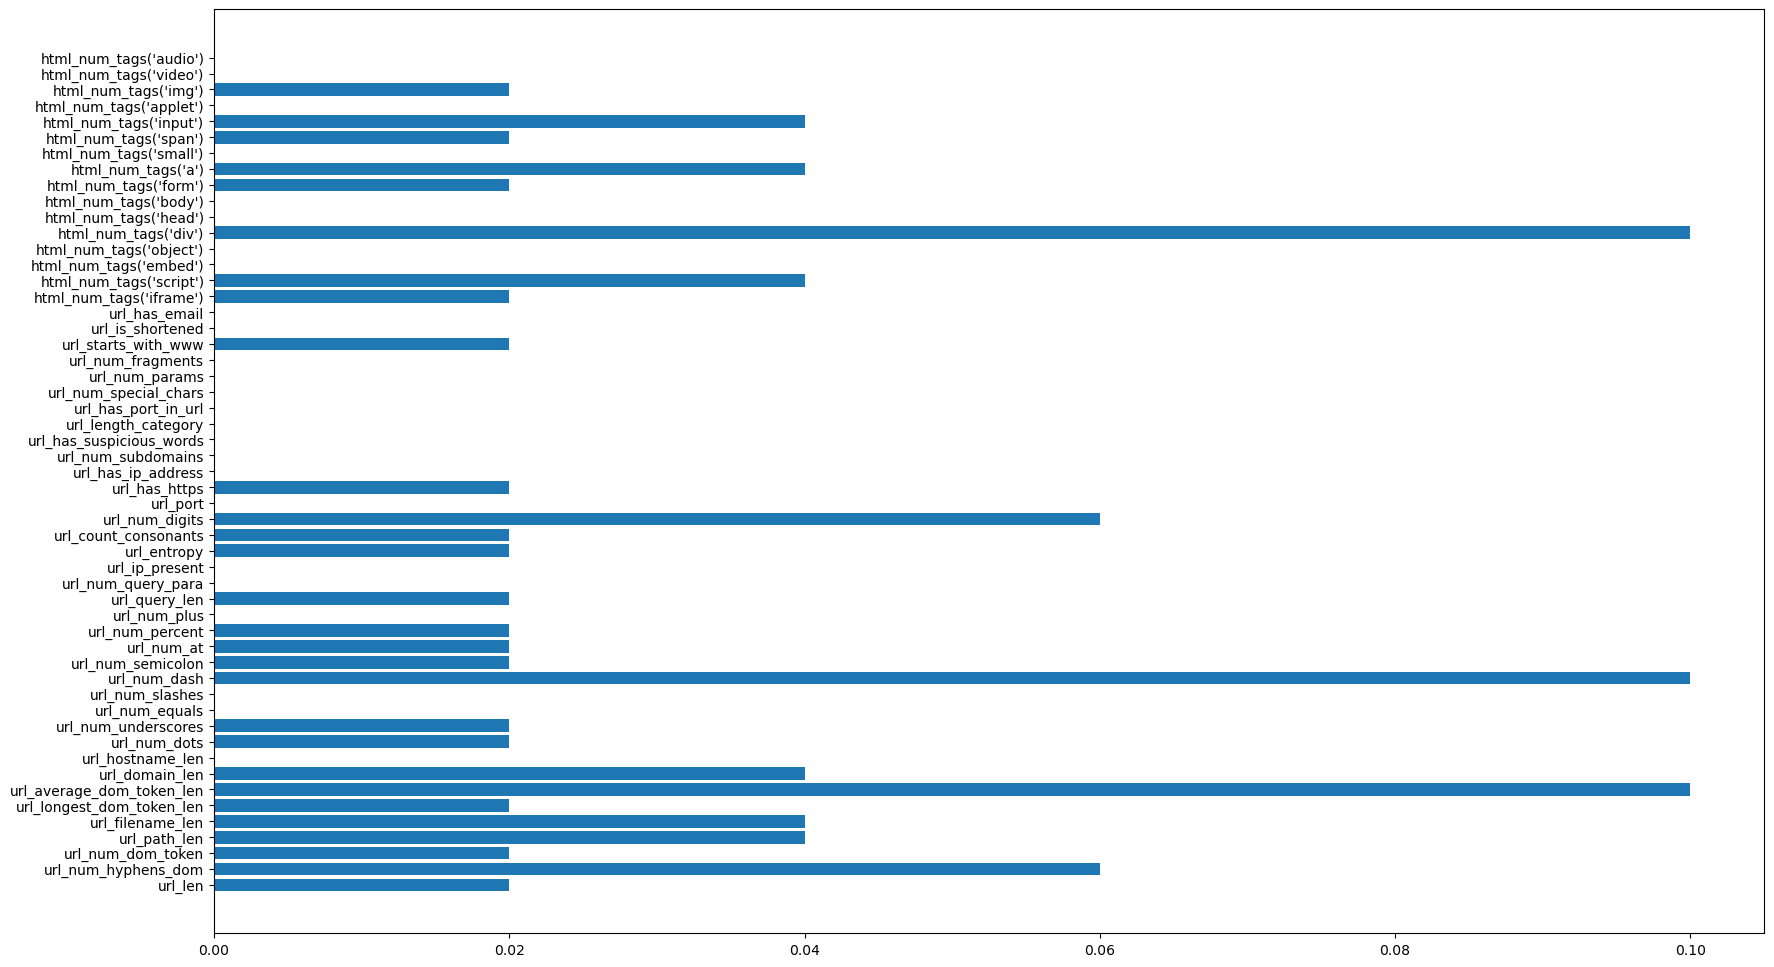

In [36]:
# 1. import
from sklearn.ensemble import AdaBoostClassifier
# 2.선언
abc = AdaBoostClassifier()
# 3. fit()
abc.fit(train_x,train_y)
# 3. predict()
abc_pred = abc.predict(val_x)
# train 및 val 데이터 정확도 확인 : score()
abc.score(train_x, train_y), abc.score(val_x, val_y)
#Confusion Matrix 확인
confusion = confusion_matrix(val_y, abc_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)
# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=train_dropna_df.columns[:-1],
        width = abc.feature_importances_)
plt.show()

### <b> Q5. Gradient Boost 모델

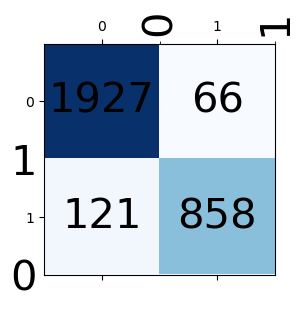

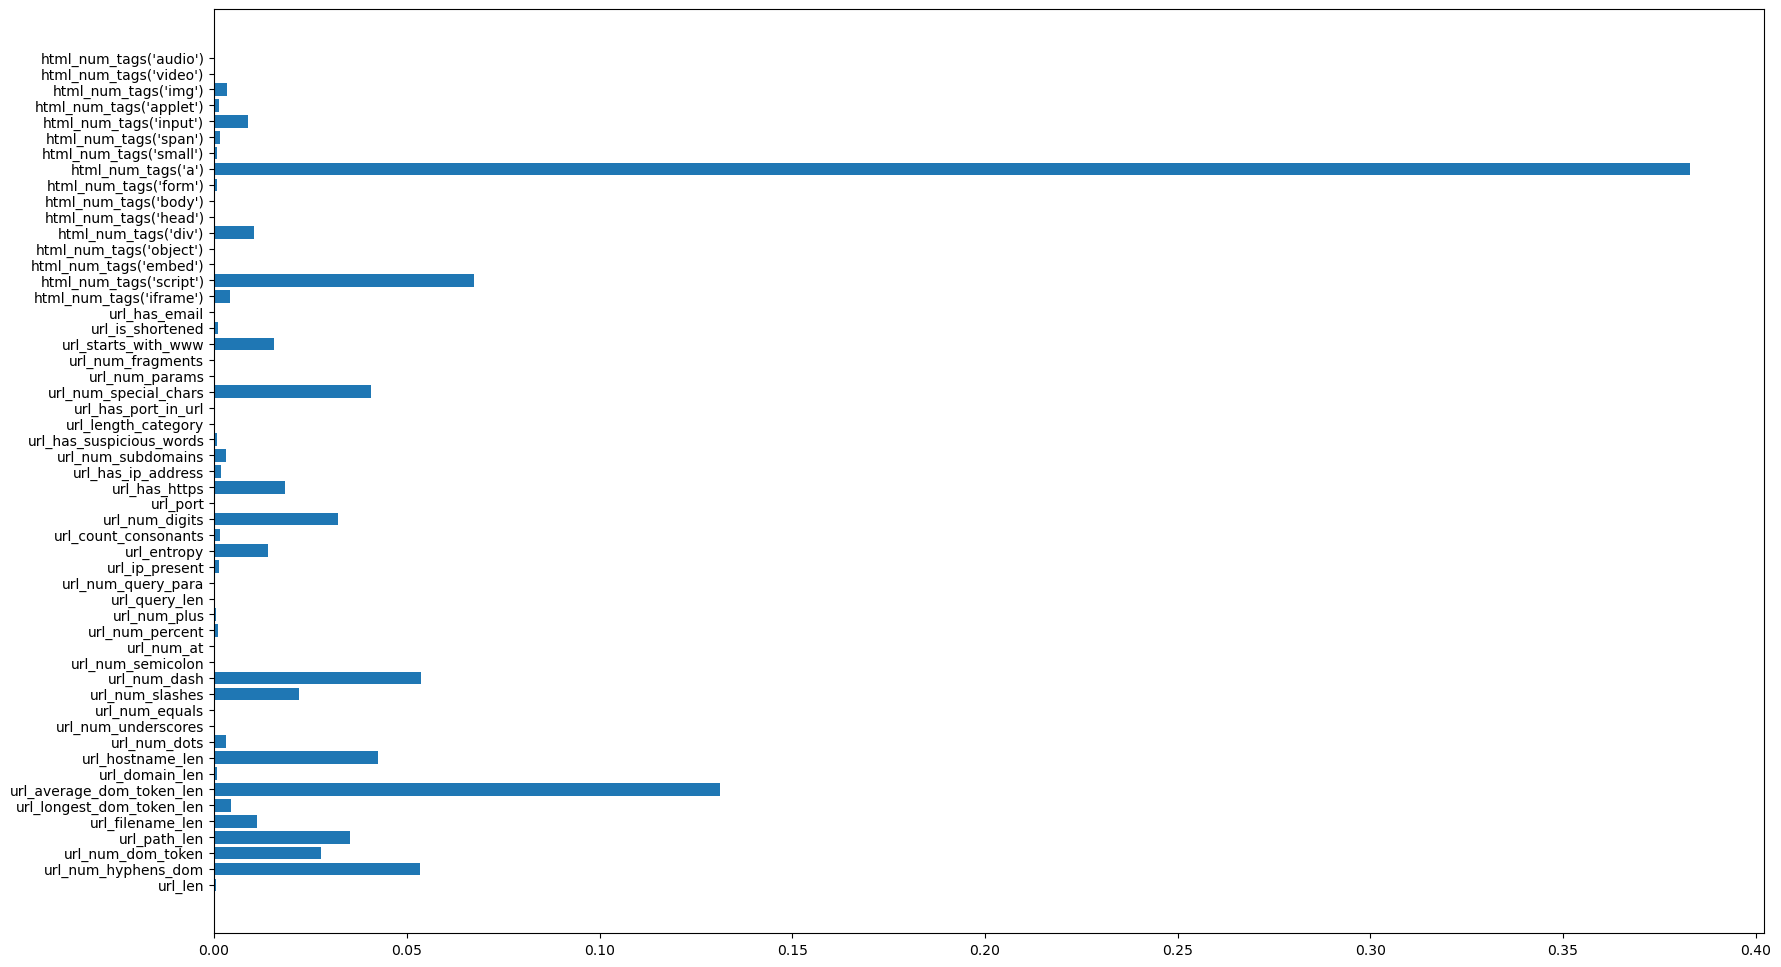

In [37]:
# 1. import
from sklearn.ensemble import GradientBoostingClassifier
# 2.선언
gbc = GradientBoostingClassifier()
# 3. fit()
gbc.fit(train_x,train_y)
# 3. predict()
gbc_pred = gbc.predict(val_x)
# train 및 val 데이터 정확도 확인 : score()
gbc.score(train_x, train_y), gbc.score(val_x,val_y)
#Confusion Matrix 확인
confusion = confusion_matrix(val_y, gbc_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)
# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=train_dropna_df.columns[:-1],
        width = gbc.feature_importances_)
plt.show()

### AI모델 최적화

### <b>RandomForest GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [ {'n_estimators':[50, 100, 200, 300], 'max_depth':[5, 10, 20, 30, 50]}]

rfc = RandomForestClassifier()

rfc_grid = GridSearchCV(rfc, 
                        param_grid, # 
                        cv=2, 
                        scoring='accuracy', # Classification일때  'accuracy','f1' ...
                                            # Regression 일때 'neg_mean_squared_error','r2'...
                        n_jobs=-1,          
                        verbose=1           # Log 출력 Level 조정
                       )

rfc_grid.fit(train_x, train_y)

rfc_model = rfc_grid.best_estimator_

print('최적의 파라미터 값 : ', rfc_grid.best_params_) #교차검증으로 얻은 최고 평균 정확도
print('최고의 점수 : ', rfc_grid.best_score_) #그 점수를 만든 최적의 하이퍼파라미터 조합

Fitting 2 folds for each of 20 candidates, totalling 40 fits
최적의 파라미터 값 :  {'max_depth': 50, 'n_estimators': 300}
최고의 점수 :  0.9400057686760889


In [39]:
rfc_grid_pred = rfc_model.predict(val_x)

# train 및 val 데이터 정확도
rfc_model.score(train_x, train_y), rfc_model.score(val_x, val_y)

(1.0, 0.946164199192463)

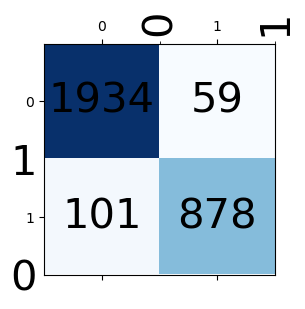

In [40]:
#Confusion Matrix
confusion = confusion_matrix(val_y, rfc_grid_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

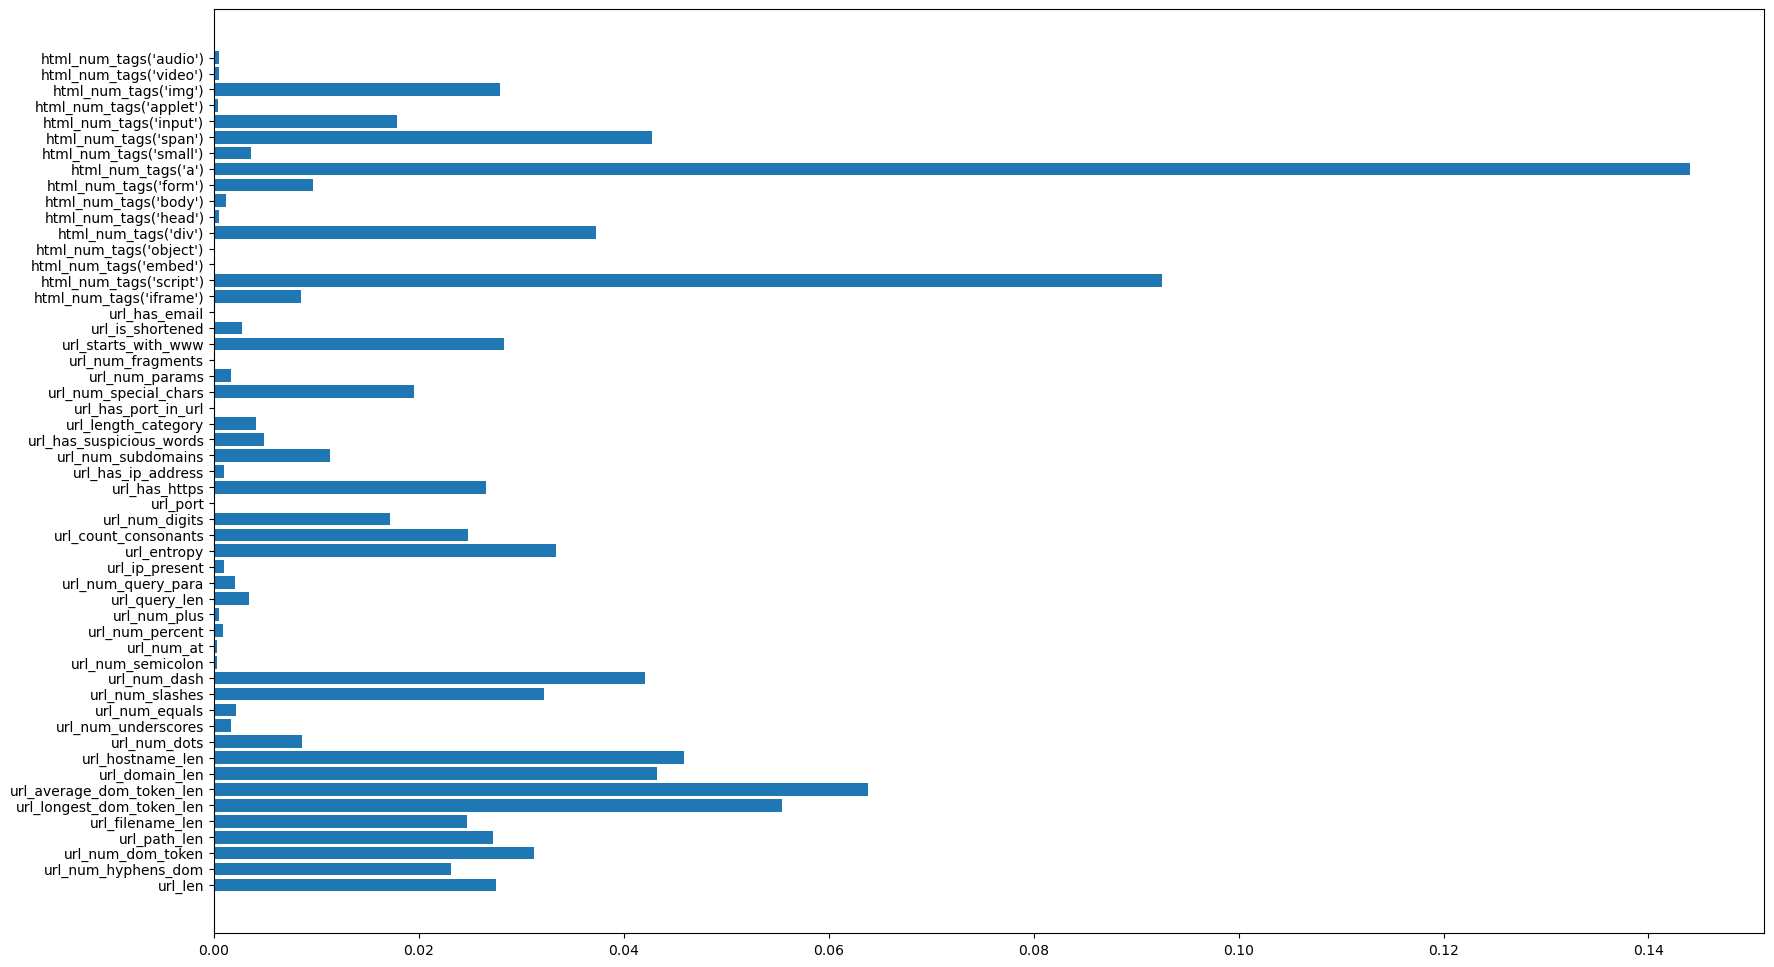

In [41]:
# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=train_dropna_df.columns[:-1],
        width = rfc_model.feature_importances_)
plt.show()

In [42]:
import joblib
#train_df.drop('Result_v1',axis=1,inplace=True)
# 학습 데이터에서 컬럼명 추출 (X가 DataFrame이어야 함)
feature_columns = train_dropna_df.columns.tolist()
print(len(feature_columns))
print(feature_columns)
joblib.dump(feature_columns, 'feature_columns_v2.pkl')


54
['url_len', 'url_num_hyphens_dom', 'url_num_dom_token', 'url_path_len', 'url_filename_len', 'url_longest_dom_token_len', 'url_average_dom_token_len', 'url_domain_len', 'url_hostname_len', 'url_num_dots', 'url_num_underscores', 'url_num_equals', 'url_num_slashes', 'url_num_dash', 'url_num_semicolon', 'url_num_at', 'url_num_percent', 'url_num_plus', 'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy', 'url_count_consonants', 'url_num_digits', 'url_port', 'url_has_https', 'url_has_ip_address', 'url_num_subdomains', 'url_has_suspicious_words', 'url_length_category', 'url_has_port_in_url', 'url_num_special_chars', 'url_num_params', 'url_num_fragments', 'url_starts_with_www', 'url_is_shortened', 'url_has_email', "html_num_tags('iframe')", "html_num_tags('script')", "html_num_tags('embed')", "html_num_tags('object')", "html_num_tags('div')", "html_num_tags('head')", "html_num_tags('body')", "html_num_tags('form')", "html_num_tags('a')", "html_num_tags('small')", "html_nu

['feature_columns_v2.pkl']

In [43]:
#모델 저장
joblib.dump(rfc_model,'best_ml_model_v2.pkl')

['best_ml_model_v2.pkl']

### 모델 시뮬

In [60]:
simul = np.array([[64,0,2,37,0,16,9.5,20,20,1,0,0,6,2,0,0,0,0,0,0,0,4.501713821688583,34,1,80,0,0,0,0,1,0,1,0,0,0,0,0,0,17,0,0,48,1,1,1,7,0,28,3,0,1,0,0]])  # -1 ~ 1 사이로 변환된 타깃값을 제외한 입력값들이 들어가야함

In [61]:
import pandas as pd
import joblib

# 모델 및 피처 목록 불러오기
ml_model = joblib.load('best_ml_model_v2.pkl')
model_features = joblib.load('feature_columns_v2.pkl')  # 정확히 41개
model_features = [col for col in model_features if col != 'repu']
print(model_features)
# # CSV 불러오기
# df = pd.read_csv('Sample_row1.csv')

# # 라벨 컬럼 제거
# for label_col in ['Unnamed: 0','Result_v1', 'repu',"html_num_tags('applet')"]:
#     if label_col in df.columns:
#         df = df.drop(columns=[label_col])


# # 누락된 컬럼 0으로 추가
# for col in model_features:
#     if col not in df.columns:
#         df[col] = 0

# # 1. model_features에 없는 컬럼 찾기
# extra_cols = [col for col in df.columns if col not in model_features]
# # 2. 없애야 할 컬럼 출력
# if extra_cols:
#     print("다음 컬럼은 제거됩니다:", extra_cols)
    

# # 불필요한 컬럼 제거 (model_features에 없는 컬럼)
# df = df.drop(columns=extra_cols, axis=1)  # ✅ 정확한 순서로 41개 컬럼만 유지

# # 컬럼 순서 맞추기 (예측할 때 가장 중요!)
# df = df[model_features]

# # 샘플 선택
# simul = df.sample(n=1, random_state=None)

# 디버깅용 출력
print(f"모델 기대 피처 수: {ml_model.n_features_in_}")
print(f"입력 샘플 피처 수: {simul.shape[1]}")

# 예측 수행
res = ml_model.predict(simul)
proba = ml_model.predict_proba(simul)

pred_class = res[0]
pred_prob = proba[0][ml_model.classes_.tolist().index(pred_class)]

print(f"예측 결과: {pred_class} (확률: {pred_prob*100:.2f}%)")



['url_len', 'url_num_hyphens_dom', 'url_num_dom_token', 'url_path_len', 'url_filename_len', 'url_longest_dom_token_len', 'url_average_dom_token_len', 'url_domain_len', 'url_hostname_len', 'url_num_dots', 'url_num_underscores', 'url_num_equals', 'url_num_slashes', 'url_num_dash', 'url_num_semicolon', 'url_num_at', 'url_num_percent', 'url_num_plus', 'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy', 'url_count_consonants', 'url_num_digits', 'url_port', 'url_has_https', 'url_has_ip_address', 'url_num_subdomains', 'url_has_suspicious_words', 'url_length_category', 'url_has_port_in_url', 'url_num_special_chars', 'url_num_params', 'url_num_fragments', 'url_starts_with_www', 'url_is_shortened', 'url_has_email', "html_num_tags('iframe')", "html_num_tags('script')", "html_num_tags('embed')", "html_num_tags('object')", "html_num_tags('div')", "html_num_tags('head')", "html_num_tags('body')", "html_num_tags('form')", "html_num_tags('a')", "html_num_tags('small')", "html_num_t

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
